In [1]:
import sys
sys.path.append('F:/study/ML_project/ML_AI_project_HuiShi') # --> change here

from functions import vgg16, PCA, SVM, standard_scaler, read_data, cal_metrics
import numpy as np

SEED = 1
np.random.seed(SEED)
RAND_STATE = 1
root = "F:/study/ML_project/ML_AI_project_HuiShi/LISA_traffic_light_detection.v3i.multiclass" # --> change here
train_folder_path, test_folder_path, train_labels, test_labels = read_data.read_data(root) # read the dataset

In [2]:
# extract features using vgg16
# normalization_std = [0.229, 0.224, 0.225]
# normalization_mean = [0.485, 0.456, 0.406]
mean = [0.19240434, 0.16837405, 0.20262092]
std = [0.18612613, 0.17387361, 0.19018272]
features_train, labels_train, features_test, labels_test = vgg16.extract_features_and_labels(mean, std, train_folder_path, test_folder_path, train_labels,test_labels)

# Standardize features by removing the mean and scaling to unit variance.
X_train_std, X_test_std = standard_scaler.standard_scaler(features_train, features_test)


c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). T

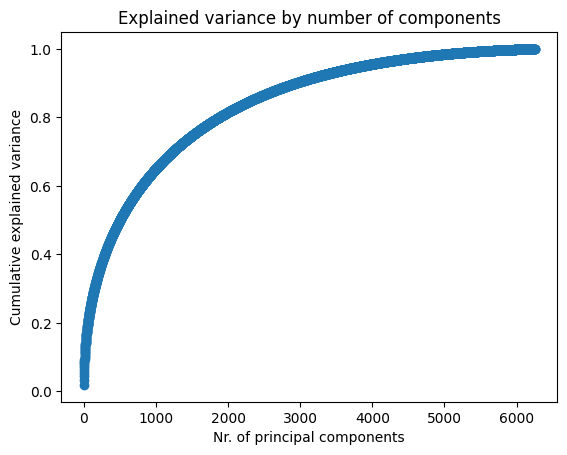

In [3]:
# Apply PCA without specifying the number of components to keep, in order to understand how many PCs are sufficient.
# Plot the explained variance ratio in a cumulative fashion, in order to visualize the cumulative variance plot.
PCA.plot_explained_variance(X_train_std, RAND_STATE)

c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7356
Precision: 0.8208
Recall: 0.9043
F1 Score: 0.8584
Confusion Matrix for Label go:
[[317 104]
 [ 38 441]]



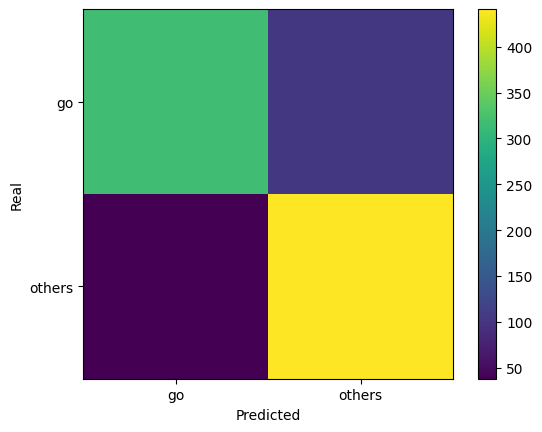

Confusion Matrix for Label stop:
[[416  86]
 [ 18 380]]



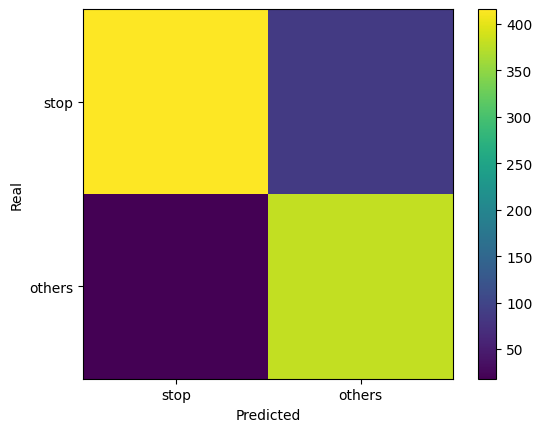

Confusion Matrix for Label warning:
[[778   6]
 [ 39  77]]



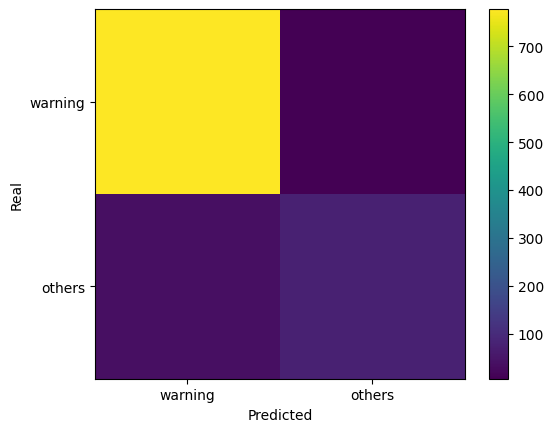

In [3]:
# Use the number of components needed to explain more than 80% of the variance in order to create a new PCA object and
# perform the final dimensionality reduction on the data.
n_components = 4000
X_train_pca, X_test_pca = PCA.pca(n_components, RAND_STATE, X_train_std, X_test_std)

# SVM
# Multi target classification, fitting one classifier per target (one-vs-rest).
# Multi-output targets predicted across multiple predictors.
kernel = 'rbf'
gamma = 0.00005
max_iteration = 1000
y_pred = SVM.multi_output_classifier_rbf(kernel, gamma, max_iteration, SEED, X_train_pca, labels_train, X_test_pca)

# print Accuracy, Precision, Recall, F1 Score
# Compute and plot a confusion matrix for each class (one-vs-rest)
cal_metrics.cal_metrics(labels_test, y_pred)